In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data
from prepare import prep_titanic_data

df = prep_titanic_data(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,2
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,2
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,2
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,2


In [2]:
# Handle missing values in the `age` column.
df.dropna(inplace=True)

In [3]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [4]:
# 1. make the thing
scaler = MinMaxScaler()

# 2. fit the thing
scaler.fit(X_train[['age', 'fare']])

# 3. use the thing
X_train[['age', 'fare']] = scaler.transform(X_train[['age', 'fare']])
X_test[['age', 'fare']] = scaler.transform(X_test[['age', 'fare']])

## Train Model
#### Create the logistic regression objec

In [5]:
# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')


#### Fit the model to the training data

In [6]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

#### Print the coefficients and intercept of the model

In [7]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.06836414 -1.9727291   0.79910148 -0.27300495  0.40904858]]
Intercept: 
 [3.3184823]


#### Estimate whether or not a passenger would survive, using the training data

In [8]:
y_pred = logit.predict(X_train)

#### Estimate the probability of a passenger surviving, using the training data


In [10]:
logit.predict(X_train[['pclass','age','fare','sibsp','parch']])

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [11]:
y_pred_proba = logit.predict_proba(X_train)

In [12]:
X_train['prediction'] = logit.predict(X_train[['pclass','age','fare','sibsp','parch']])

In [20]:
(y_train.survived == X_train.prediction).sum() / y_train.shape[0]

0.6933867735470942

In [22]:
logit.score(X_train[['pclass','age','fare','sibsp','parch']], y_train.survived)

0.6933867735470942

## Evaluate Model
#### Compute the accuracy

In [23]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train.drop(columns='prediction'), y_train)))

Accuracy of Logistic Regression classifier on training set: 0.69


#### Create a confusion matrix

In [24]:
print(confusion_matrix(y_train, y_pred))

[[190 103]
 [ 50 156]]


In [29]:
import pandas as pd
df = pd.DataFrame(confusion_matrix(y_train.survived, X_train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,190,103
Actual +,50,156


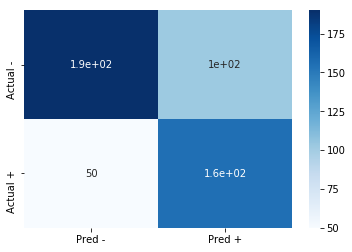

In [30]:
%matplotlib inline
import seaborn as sns

sns.heatmap(df, cmap='Blues', annot=True)

#### Compute Precision, Recall, F1-score, and Support

In [25]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       293
           1       0.60      0.76      0.67       206

   micro avg       0.69      0.69      0.69       499
   macro avg       0.70      0.70      0.69       499
weighted avg       0.71      0.69      0.70       499



In [31]:
y_train.survived.value_counts()

0    293
1    206
Name: survived, dtype: int64

In [32]:
X_train.prediction.value_counts()

1    259
0    240
Name: prediction, dtype: int64

## Test Model
#### Compute the accuracy of the model when run on the test data

In [26]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.67


## Visualize Model

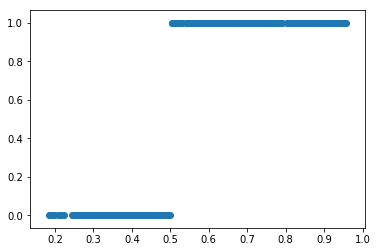

In [27]:
## verify
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)